# Netflix Movies & TV Shows - Exploratory Data Analysis 
**By Sanjana Rawal | June 2025**

In [29]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
path = kagglehub.dataset_download("shivamb/netflix-shows")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\Sanjana Rawal\.cache\kagglehub\datasets\shivamb\netflix-shows\versions\5


# Loading dataset

In [30]:
df = pd.read_csv(f"{path}/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Exploring data

In [39]:
print("Total rows , columns = " , df.shape)
print()
print("Column names = " , df.columns)
print()
print(df.info()) #To check for not null value's count and data type of the column 
print()
print(df.describe()) 
print()
print("Null values = \n" , df.isnull().sum())
print()
print("Duplicated rows = " , df.duplicated().sum())

Total rows , columns =  (8807, 12)

Column names =  Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None

       release_ye

# Cleaning the dataset 

In [40]:
df.drop_duplicates(inplace=True) #Removing duplicated rows
df["date_added"] = pd.to_datetime(df["date_added"] , errors = "coerce") #converting data type of the column 
#Fillig null values in some columns 
df["country"] = df["country"].fillna("Unknown")
df["cast"] = df["cast"].fillna("Unknown")
df["director"] = df["director"].fillna("Unknown")

In [10]:
#Checking for the changes we applied 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB
None


# Creating visuals

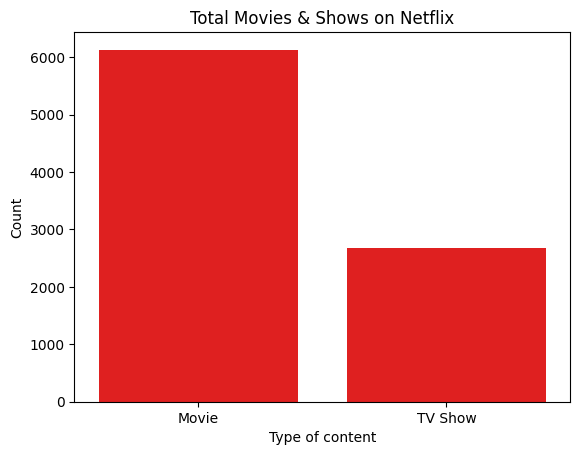

In [11]:
#Netflix Content Breakdown by Type
sns.barplot(data=df , x = df['type'].value_counts().index , y = df['type'].value_counts().values , color = "red") 
plt.ylabel("Count")
plt.xlabel("Type of content")
plt.title("Total Movies & Shows on Netflix")
plt.show()

**Number of movies on Netflix is greater than number of TV Shows**

release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: count, Length: 74, dtype: int64


C:\Users\Sanjana Rawal\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sanjana Rawal\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


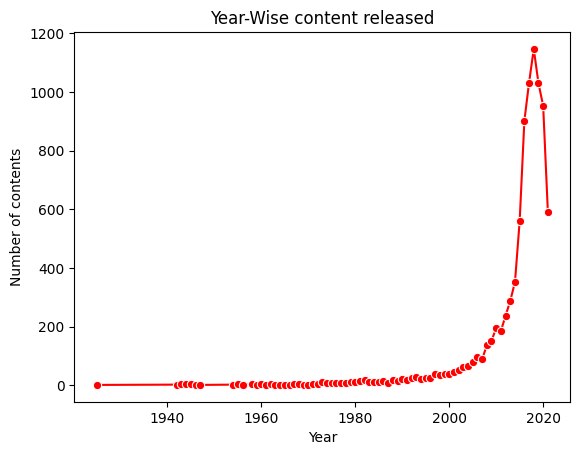

In [12]:
#Number of Netflix Titles Released Each Year
years = df["release_year"].value_counts().sort_index()
print(years)

sns.lineplot(x=years.index , y=years.values , marker="o" , color="red")
plt.xlabel("Year")
plt.ylabel("Number of contents")
plt.title("Year-Wise content released")
plt.show()

**Most of the content released on Netflix is during 2016-2020 period**

listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


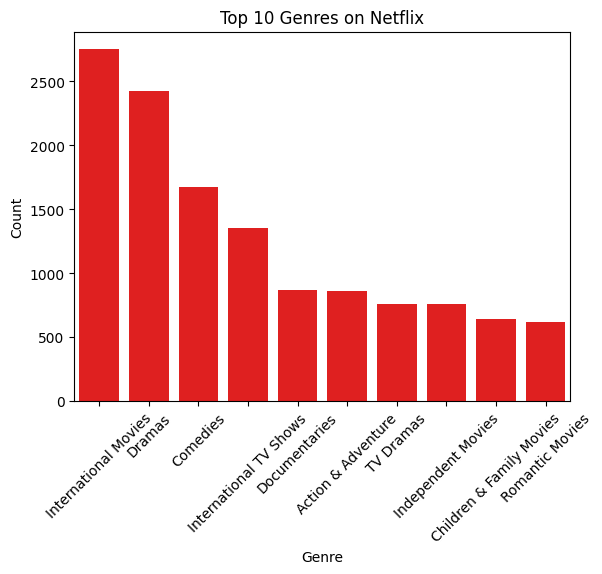

In [13]:
#Most Popular Content Genres on Netflix
genre = df['listed_in'].str.split(', ').explode()
top_genres = genre.value_counts().head(10)
print(top_genres)
sns.barplot(x=top_genres.index, y=top_genres.values , color="red")
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

**Mostly , international movies are released on Netflix - followed by Dramas , Comedy genre**

country
United States     3689
India             1046
Unknown            831
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Name: count, dtype: int64


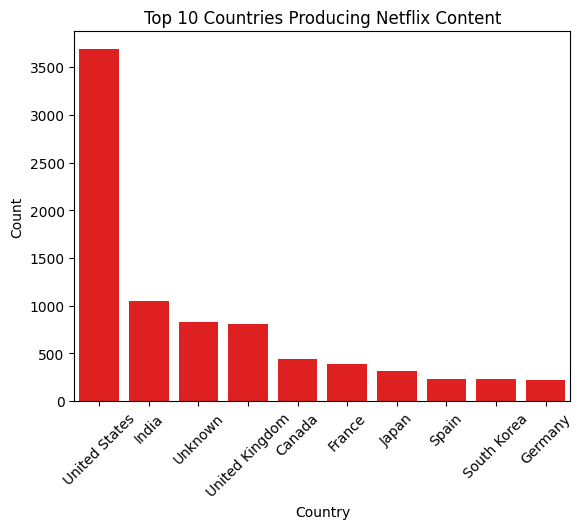

In [14]:
#Leading Countries Producing Content for Netflix
country = df['country'].str.split(', ').explode()
top_countries = country.value_counts().head(10)
print(top_countries)
sns.barplot(data=df , x=top_countries.index , y=top_countries.values , color="red")
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

**Most of the content at Netflix is produced by United States**

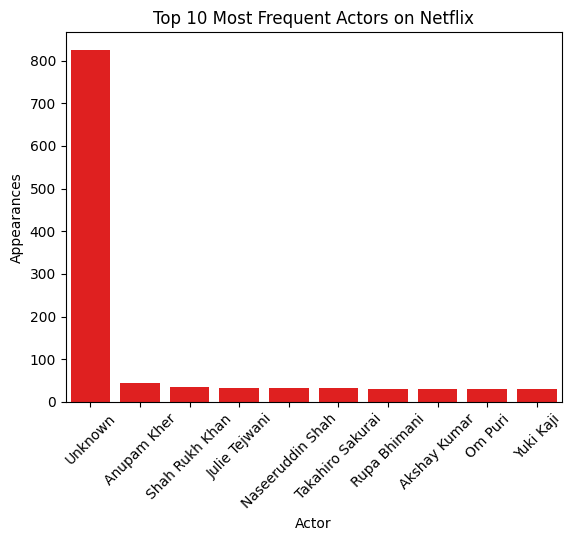

In [15]:
#Actors with the Most Appearances in Netflix Content
actor = df['cast'].str.split(', ').explode()
top_actors = actor.value_counts().head(10)
sns.barplot(data=df , x=top_actors.index , y=top_actors.values , color="red")
plt.title("Top 10 Most Frequent Actors on Netflix")
plt.xlabel("Actor")
plt.ylabel("Appearances")
plt.xticks(rotation=45)
plt.show()

**There exists so much content whose actors are not known**

type          Movie  TV Show
release_year                
1925            0.0      1.0
1942            2.0      0.0
1943            3.0      0.0
1944            3.0      0.0
1945            3.0      1.0
...             ...      ...
2017          767.0    265.0
2018          767.0    380.0
2019          633.0    397.0
2020          517.0    436.0
2021          277.0    315.0

[74 rows x 2 columns]


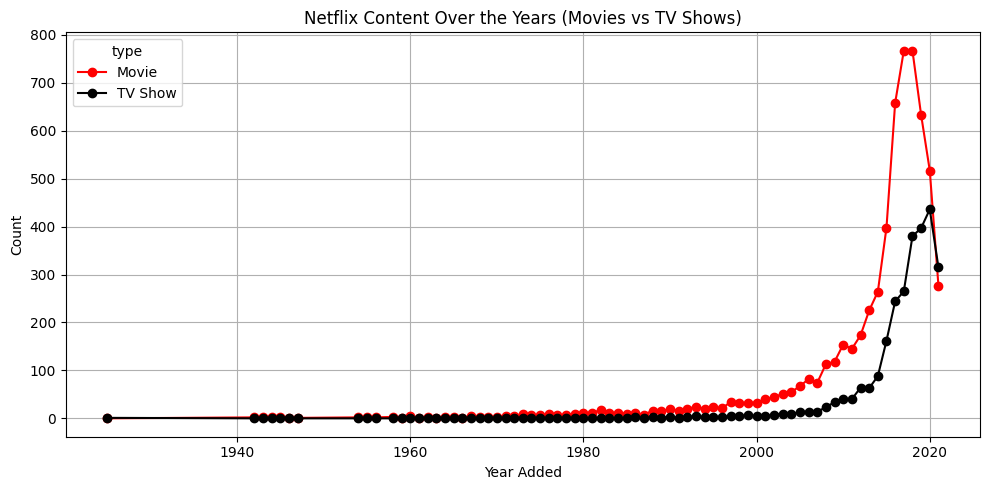

In [16]:
#Growth of Movies vs TV Shows on Netflix Over the Years
content_by_year_type = df.groupby(['release_year', 'type']).size().unstack().fillna(0)
print(content_by_year_type)
# plt.plot(content_by_year_type.index, content_by_year_type.iloc[:, 0], color="red")
# plt.plot(content_by_year_type.index, content_by_year_type.iloc[:, 1], color="black")
content_by_year_type.plot(kind='line', marker='o', figsize=(10,5), color=['red', 'black'])
plt.title("Netflix Content Over the Years (Movies vs TV Shows)")
plt.xlabel("Year Added")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()


**Most of the content in Movie type is released during 2015-2020 , And contents released for show type were at peak during 2020 .
Somehow , number of shows released are less than number of movies**

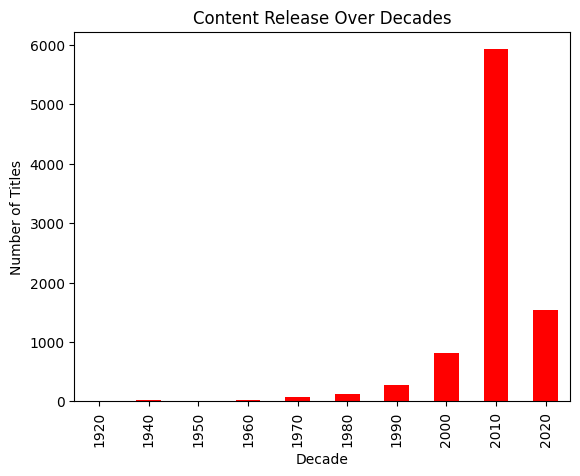

In [17]:
#Netflix Content Distribution Over the Decades
df['decade'] = (df['release_year'] // 10) * 10
decade_count = df.groupby('decade')['title'].count()
decade_count.plot(kind='bar', color='red')
plt.title('Content Release Over Decades')
plt.xlabel('Decade')
plt.ylabel('Number of Titles')
plt.show()

**Most of the netflix content are released during decade 2010-2020**